## **Part1: EDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ESAA/data/titanic/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() # 총 결측값 확인

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


-  얼마나 많이 살아남았는가?

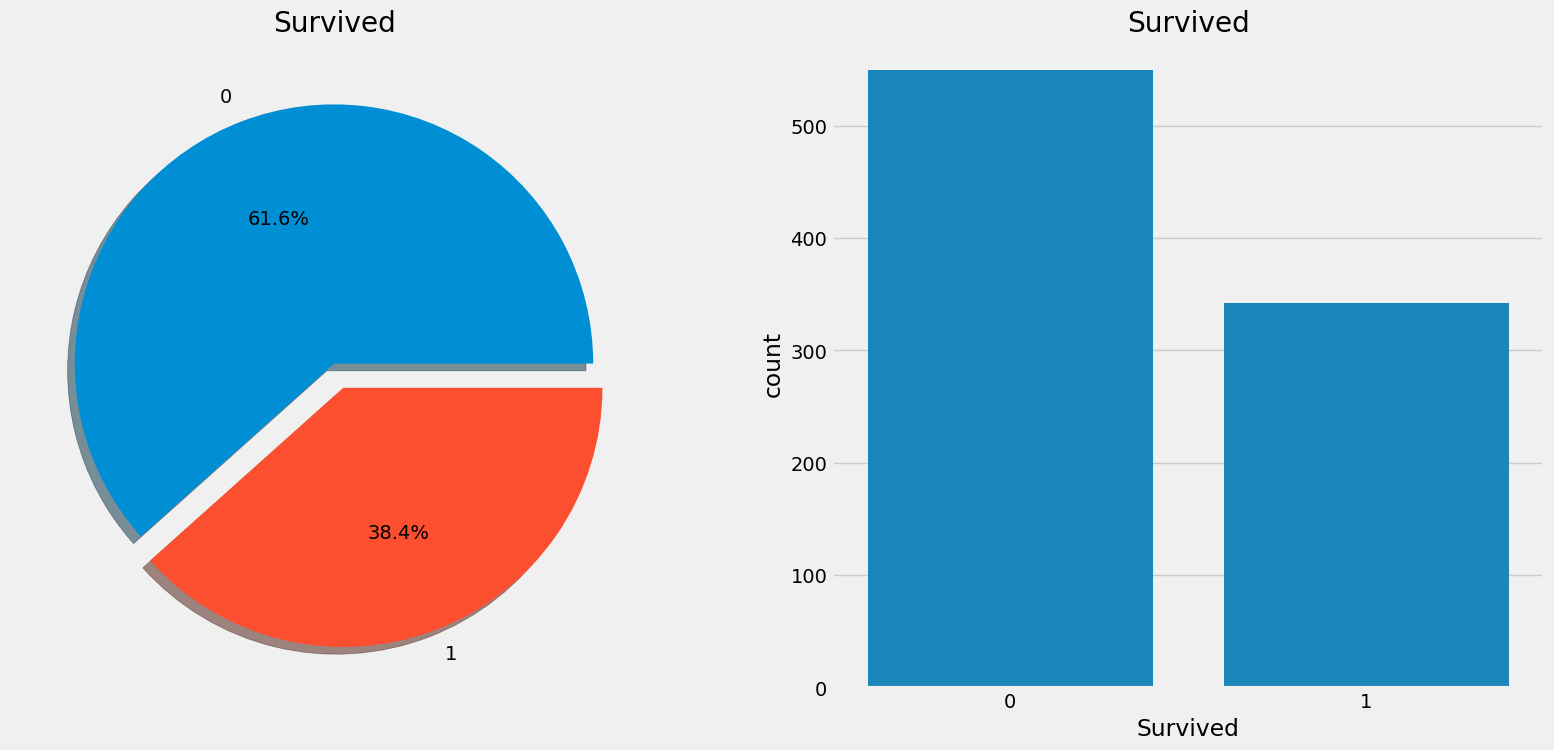

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- **특징의 유형들**

범주형 변수 (Categorical Features)
범주형 변수는 두 개 이상의 범주를 가지며, 해당 특성의 각 값이 특정 범주로 분류될 수 있는 변수임. 예를 들어, 성별은 남성과 여성이라는 두 범주를 가지는 범주형 변수임.이러한 변수는 순서를 매기거나 정렬할 수 없으며 명목 변수(Nominal Variables)라고도 함.

순서형 변수 (Ordinal Features)
순서형 변수는 범주형 변수와 유사하지만, 그 값들 사이에 상대적인 순서가 있거나 정렬이 가능하다는 차이점이 있음. 예를 들어, 키(Height)라는 특성이 ‘크다’, ‘중간’, ‘작다’의 값을 가질 경우, 키는 순서형 변수로, 이 경우 값들 간의 상대적인 정렬이 가능함.

순서형 변수: 승객 등급(PClass).
연속형 변수 (Continuous Feature)
연속형 변수는 두 지점 사이 또는 해당 열에서 최소값과 최대값 사이의 값을 가질 수 있는 특성임.

연속형 변수: 나이(Age).

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

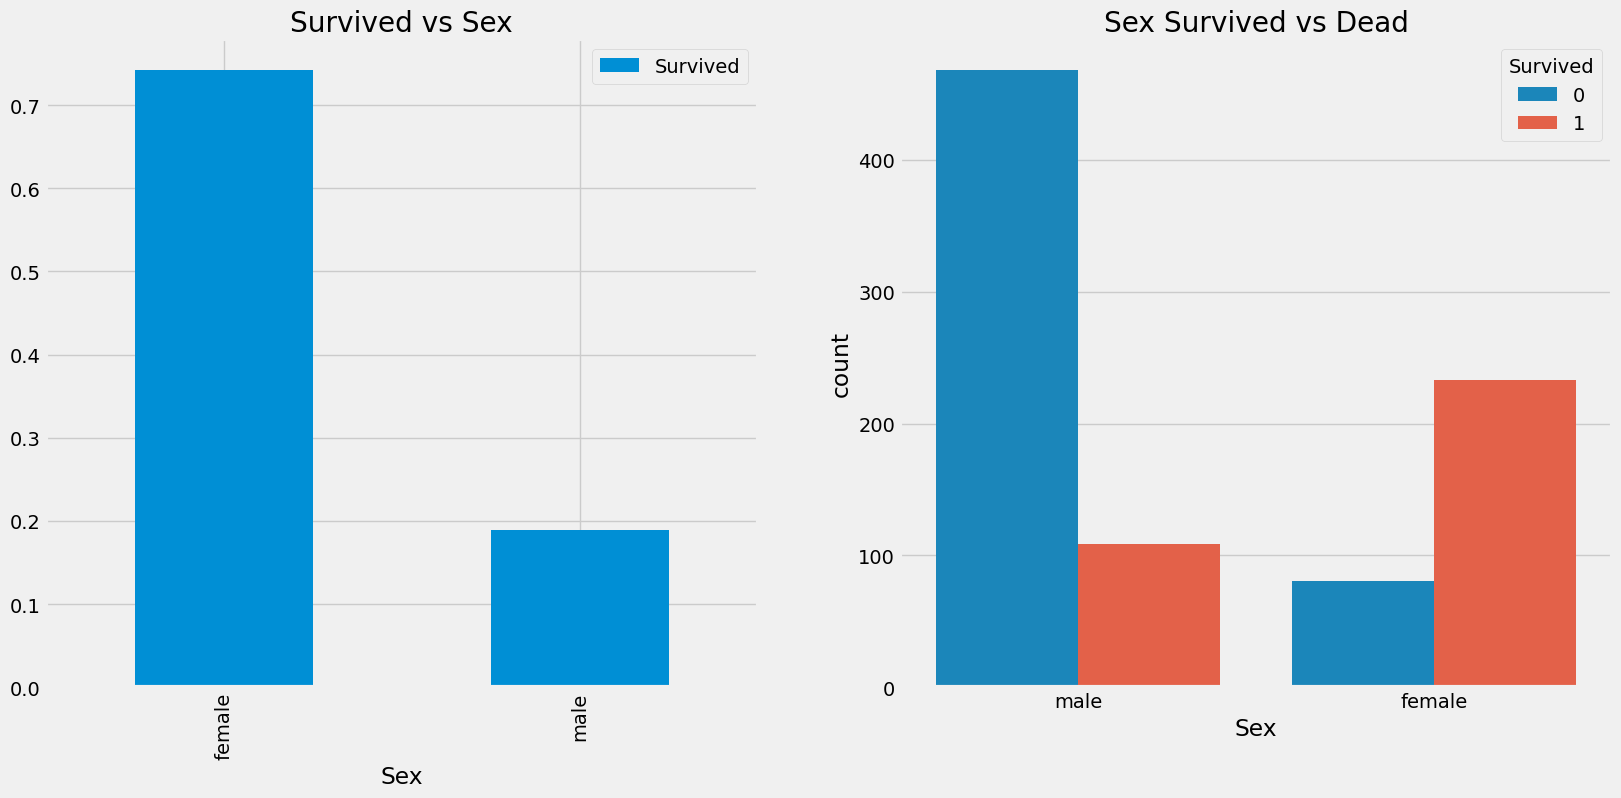

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex Survived vs Dead')
plt.show()

- **순서형 특징**

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


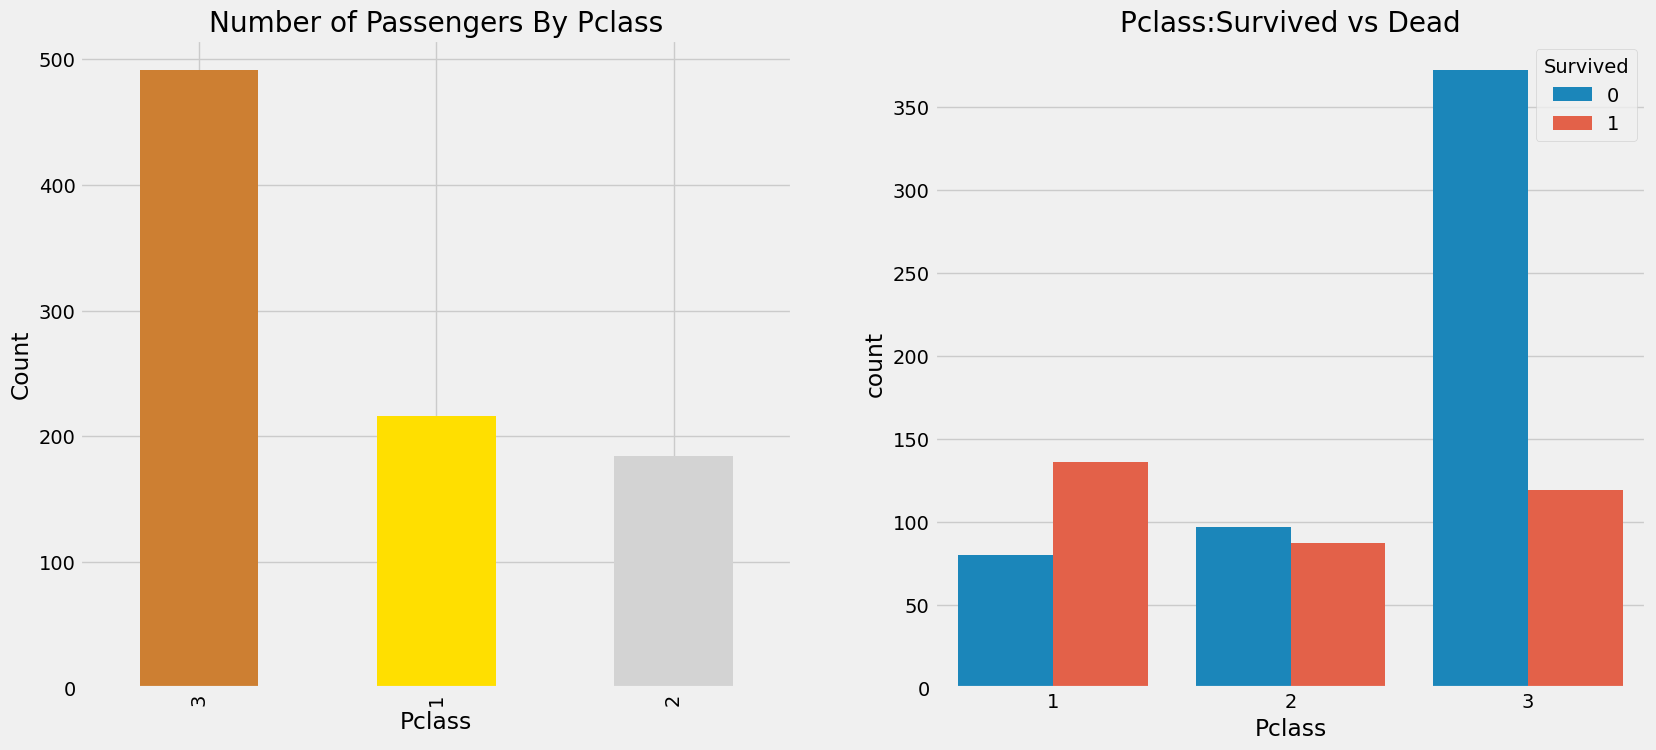

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

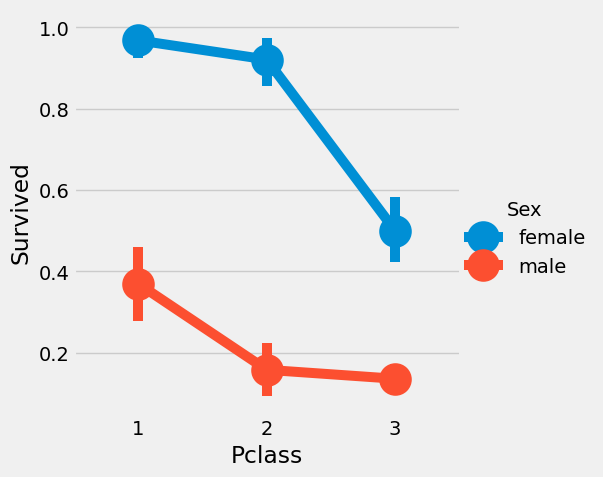

In [ ]:
# 이전 코드
# sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

- **나이 --> 연속적인 특징**

In [ ]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


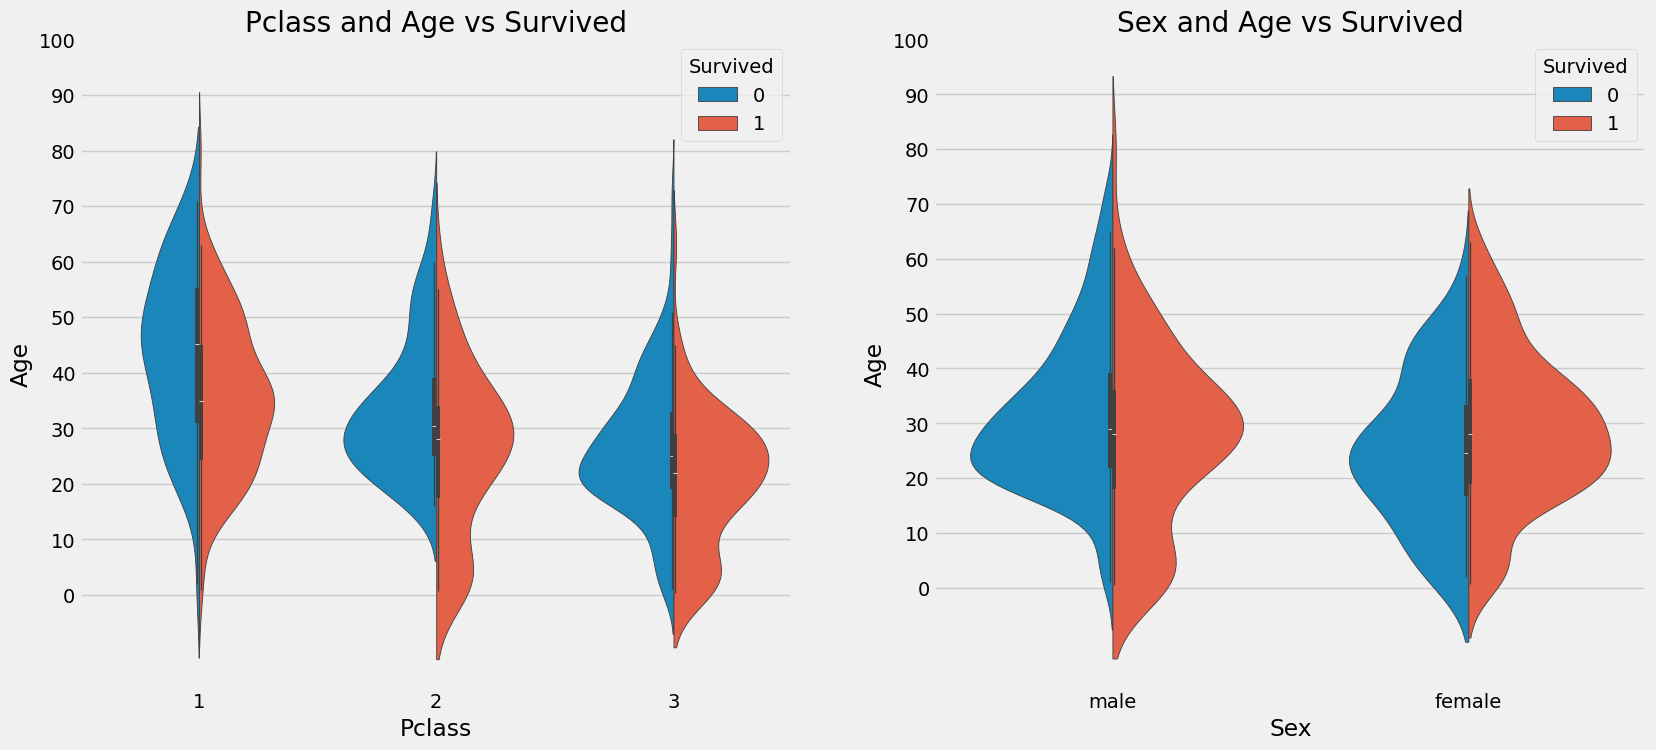

In [ ]:
f,ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x='Pclass', y = 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- **관찰 결과:**

1. 어린이의 수는 객실 등급(Pclass)에 따라 증가하며, 10세 이하(어린이)의 생존율이 객실 등급에 상관없이 높은 것으로 보임.

2. 20-50세의 승객 중 Pclass 1등급에 속한 사람들의 생존 가능성이 높으며, 특히 여성의 생존 가능성은 더 좋음.

3. 남성의 경우, 나이가 증가할수록 생존 가능성이 낮아지는 경향이 있음.

-> Mr와 Mrs 그룹에 각각의 평균 나이를 할당하여 결측값 처리


In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [ ]:
# 나이 결측값 채우기
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [ ]:
data.Age.isnull().any()

False

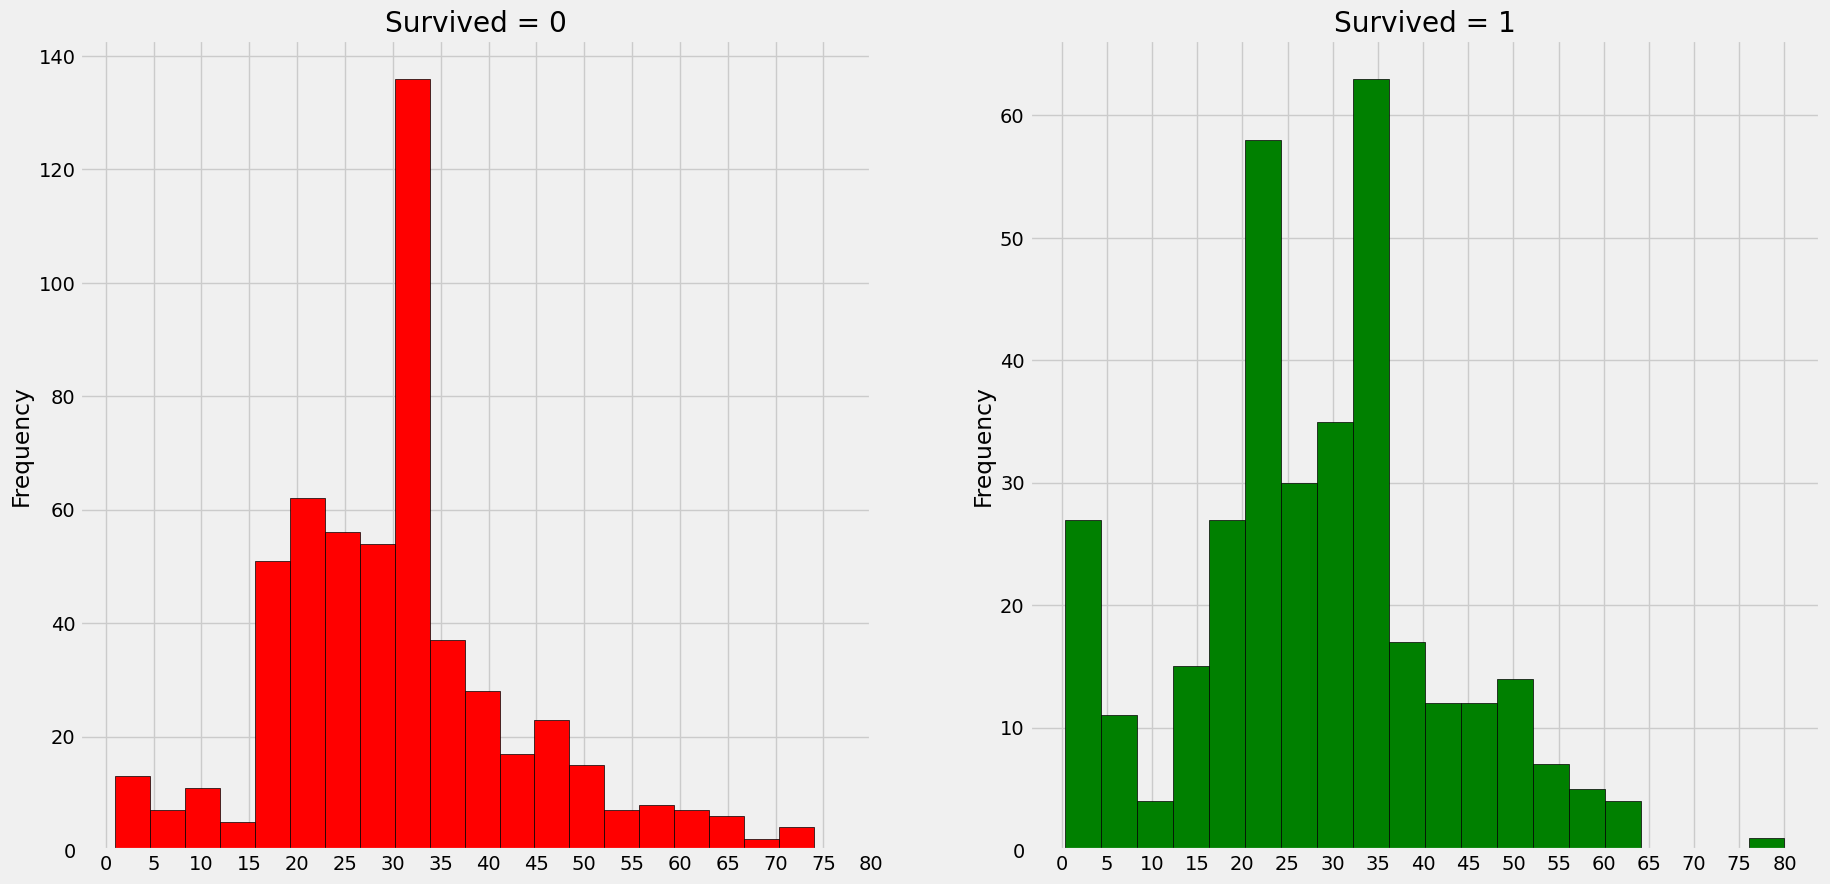

In [ ]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

-  **관찰 결과:**

1. 나이가 5세 미만인 유아들은 대거 구조됨. (여성과 어린이 우선 정책에 따라)

2. 가장 나이가 많은 승객(80세)이 구조됨.

3. 30-40세 연령대에서 사망자가 가장 많았음.

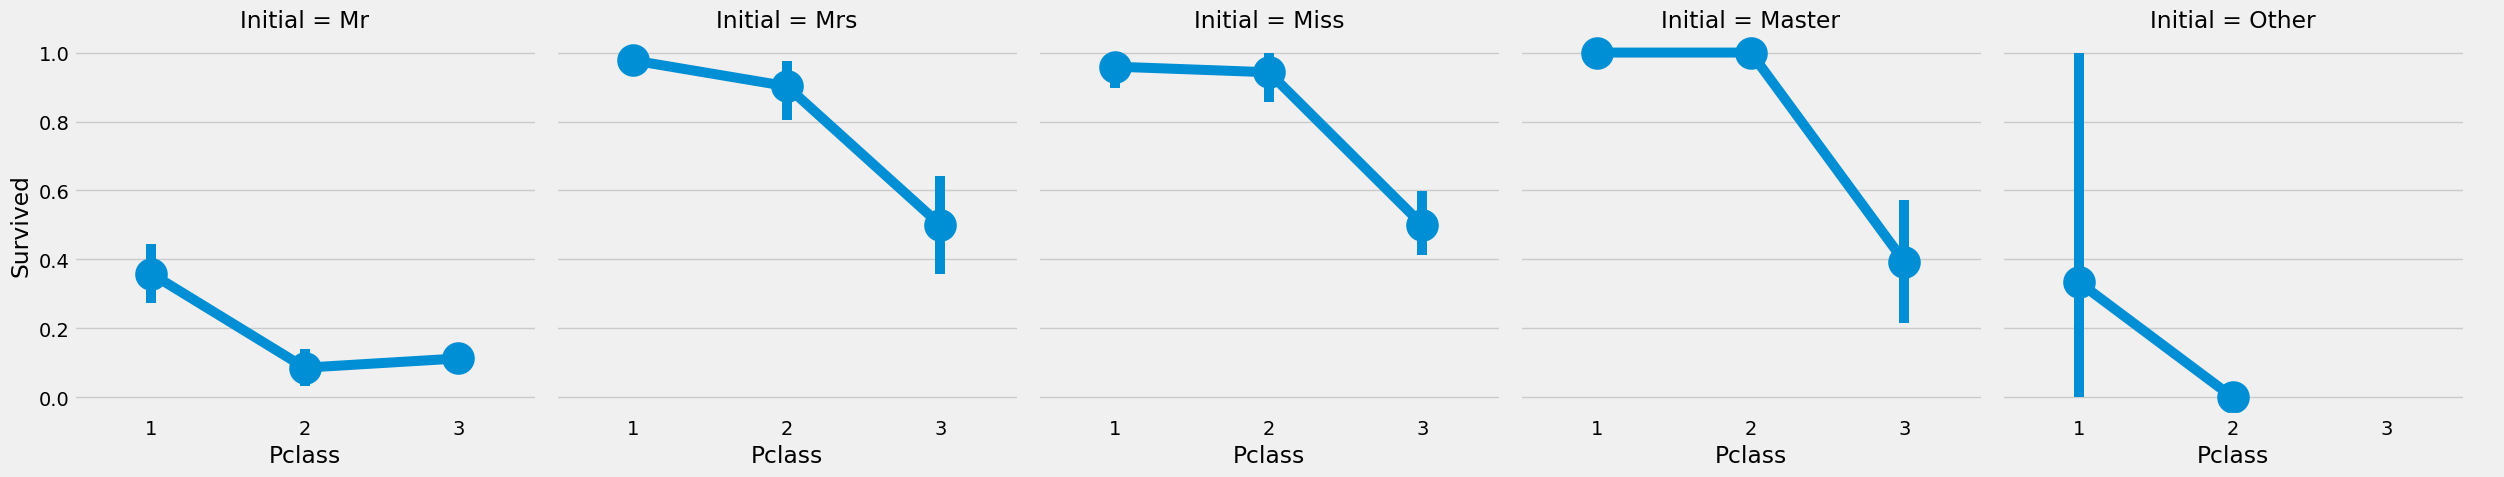

In [ ]:
# 이전 코드
# sns.factorplot('Pclass', 'Survived',col='Initial', data=data)
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

- **Embarked --> 범주형 값**

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

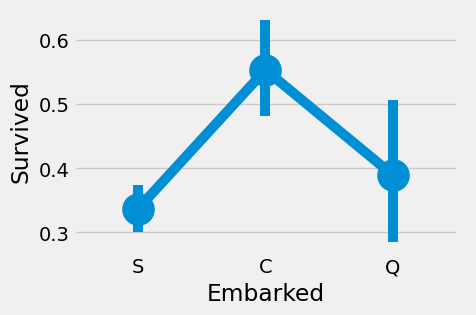

In [ ]:
# 캐글 코드
# sns.factorplot('Embarked', 'Survived', data=data)
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

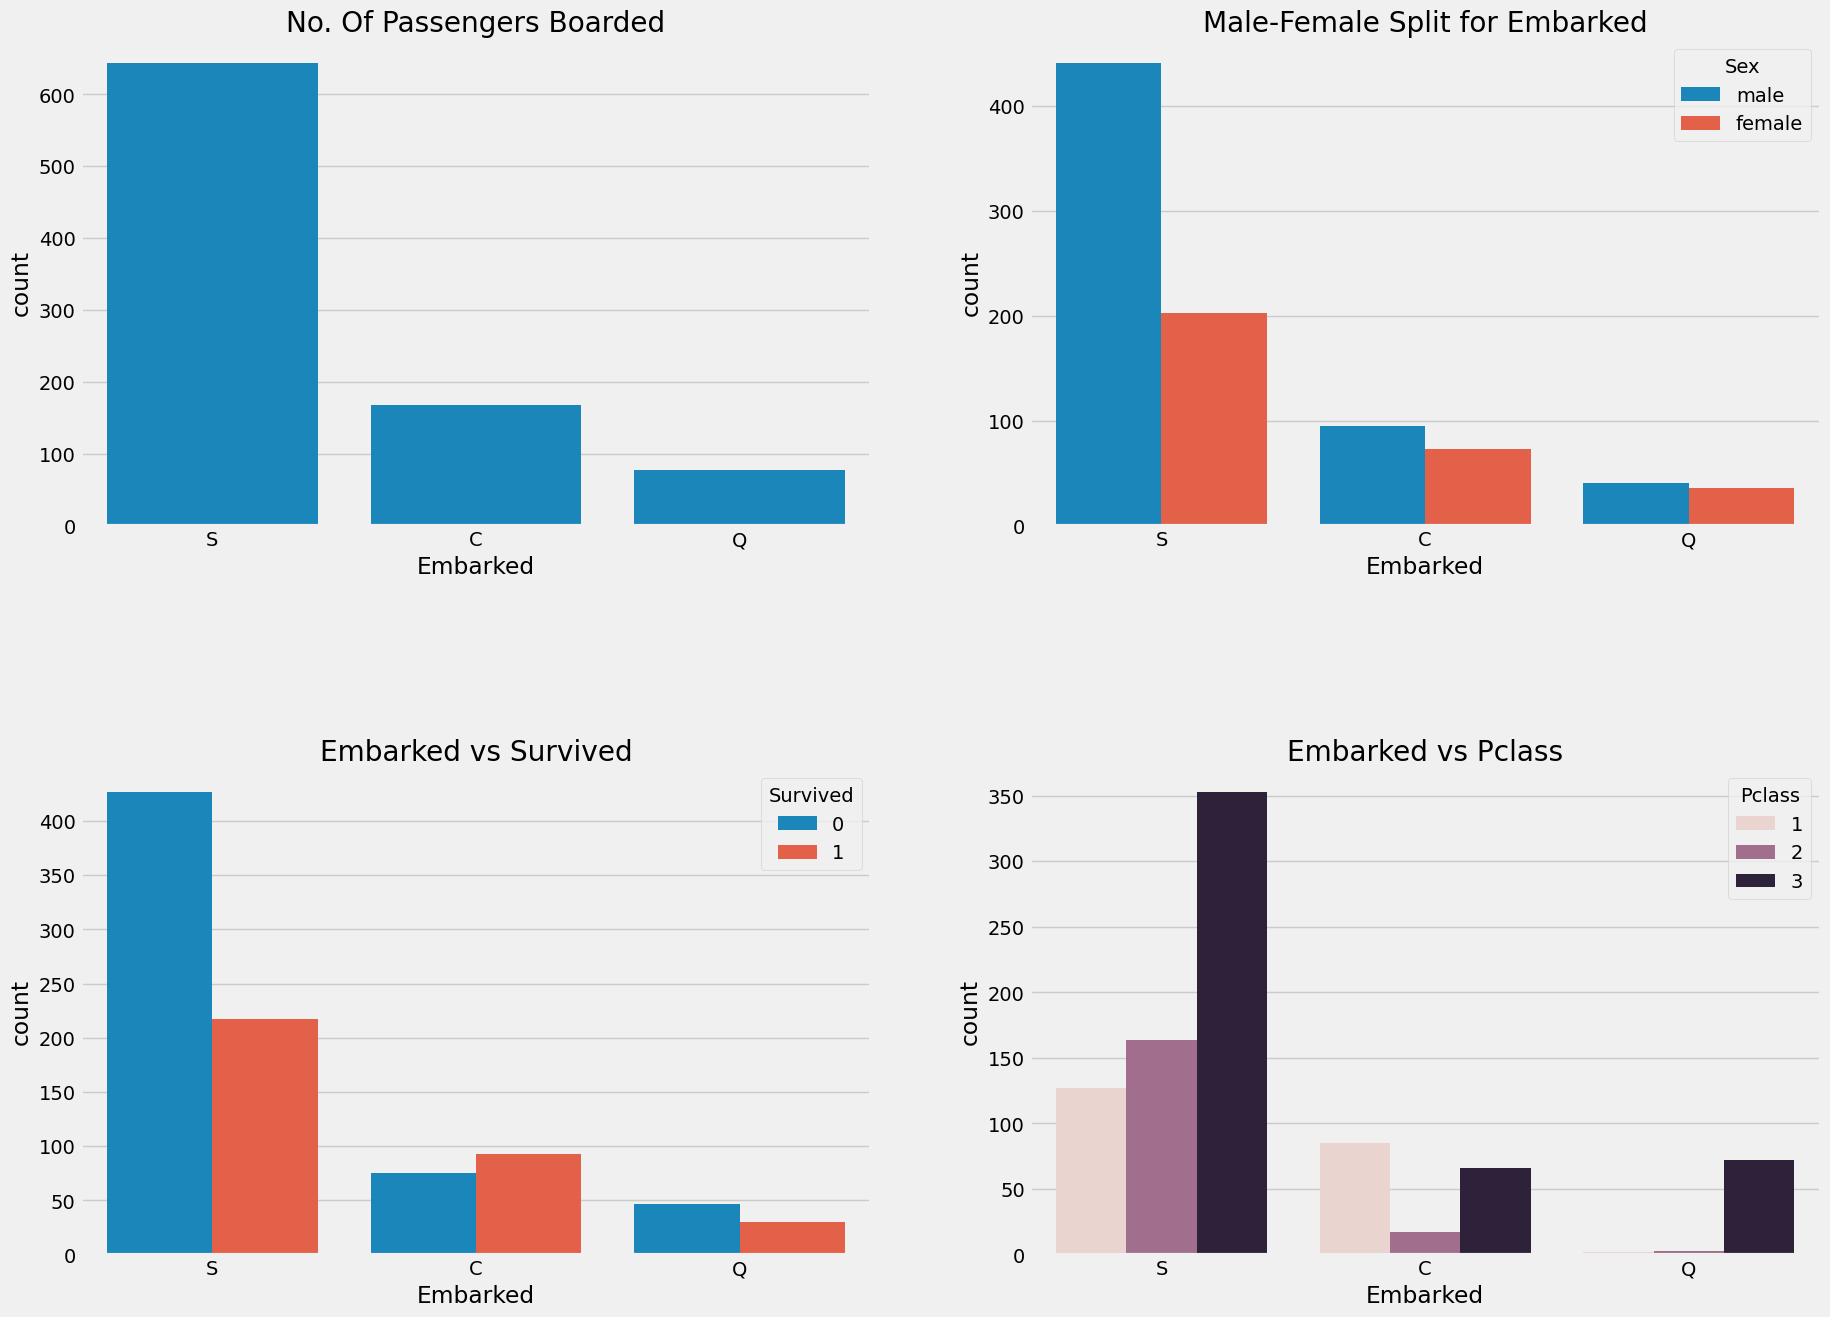

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- **관찰 결과**

1. 최대 승객들이 S 항구에서 탑승하였으며, 그 중 대다수는 Pclass 3에 속함.

2. C 항구에서 탑승한 승객들은 생존 비율이 높아 운이 좋았던 것으로 보입니다. 이는 아마도 Pclass 1과 Pclass 2 승객들이 모두 구조되었기 때문일 수 있음.

3. S 항구는 부유한 사람들이 대다수 탑승한 항구로 보이지만, 생존 가능성이 낮은 이유는 Pclass 3의 승객 중 약 81%가 생존하지 못했기 때문임.

4. Q 항구에서는 거의 95%의 승객이 Pclass 3에 속했음.

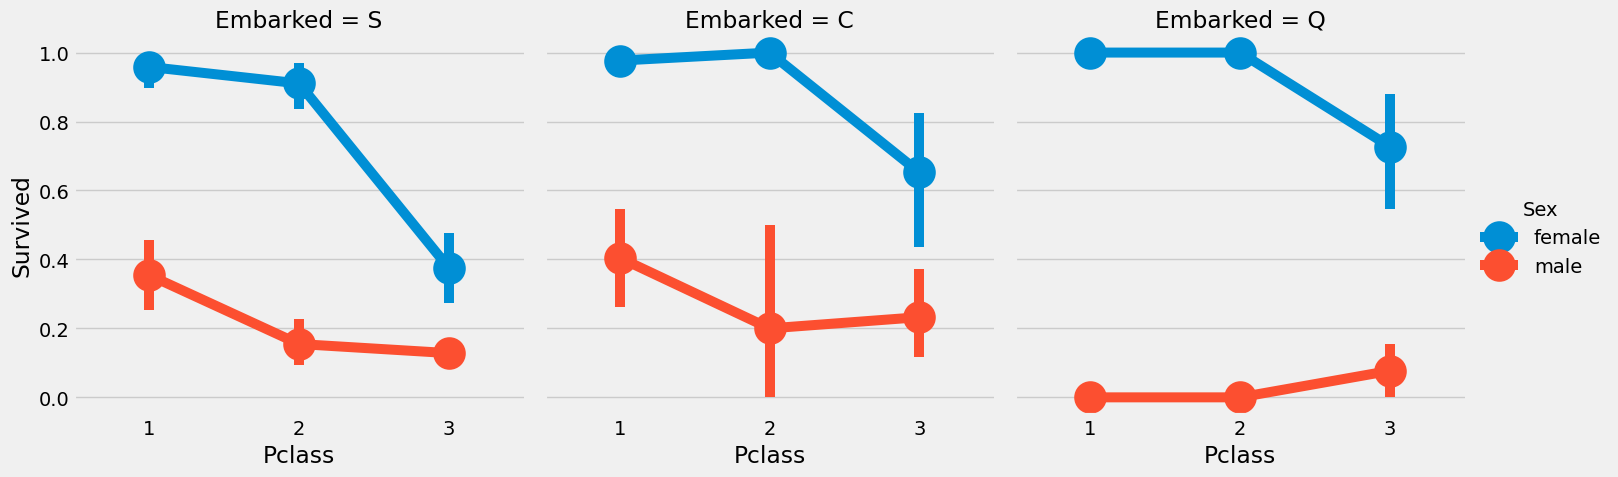

In [ ]:
# 캐글 필사
# sns.factorplot('Pclass', 'Survived', hue='Sex', col='Emnarked', data=data)
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

- **관찰 결과:**

1. Pclass 1과 Pclass 2에서 여성의 생존 가능성은 거의 1에 가까움. 즉, 생존할 확률이 매우 높음.

2. S 항구는 Pclass 3 승객들에게 매우 불운한 장소로 보이며, 남성과 여성 모두의 생존율이 매우 낮음.(재정적 여건이 중요함).

3. Q 항구는 남성에게 가장 불운한 장소로 보이며, 거의 모든 승객이 Pclass 3에 속했음.

In [ ]:
# Embarked의 결측값 채우기
data['Embarked'].fillna('S', inplace=True)

In [ ]:
data.Embarked.isnull().any()

False

- **이산형 특징**

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [ ]:
pd.crosstab(data['SibSp'],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


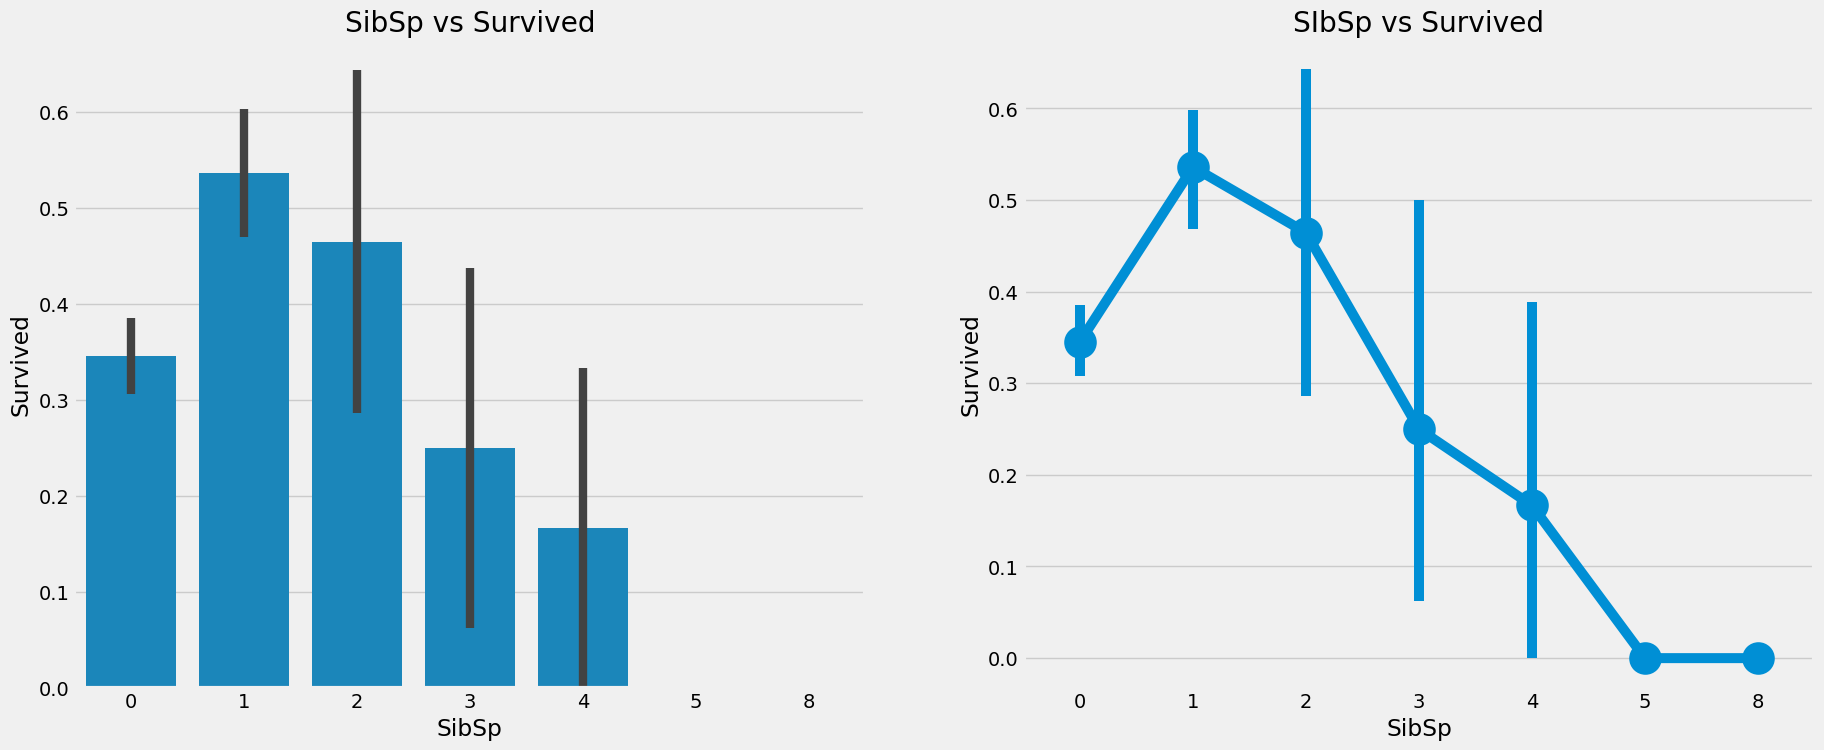

In [ ]:
%matplotlib inline
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
# 캐글 필기
# sns.factorplot(x='SibSp', y='Survived', data=data, ax=ax[1])
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SIbSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 관찰 결과
  - 승객이 혼자 탑승하고 형제자매가 없는 경우 생존 확률이 34.5%
  - 제자매의 수가 많아질수록 생존 확률이 대체로 감소하는 것을 볼 수 있음
  - 5-8명의 가족이 함께 있는 경우 생존 확률이 0%임.
  - 형제자매 수(SibSp)가 3 이상인 사람들은 모두 3등석(Pclass3)에 있었다는 것을 알 수 있었음.

In [ ]:
pd.crosstab(data['Parch'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


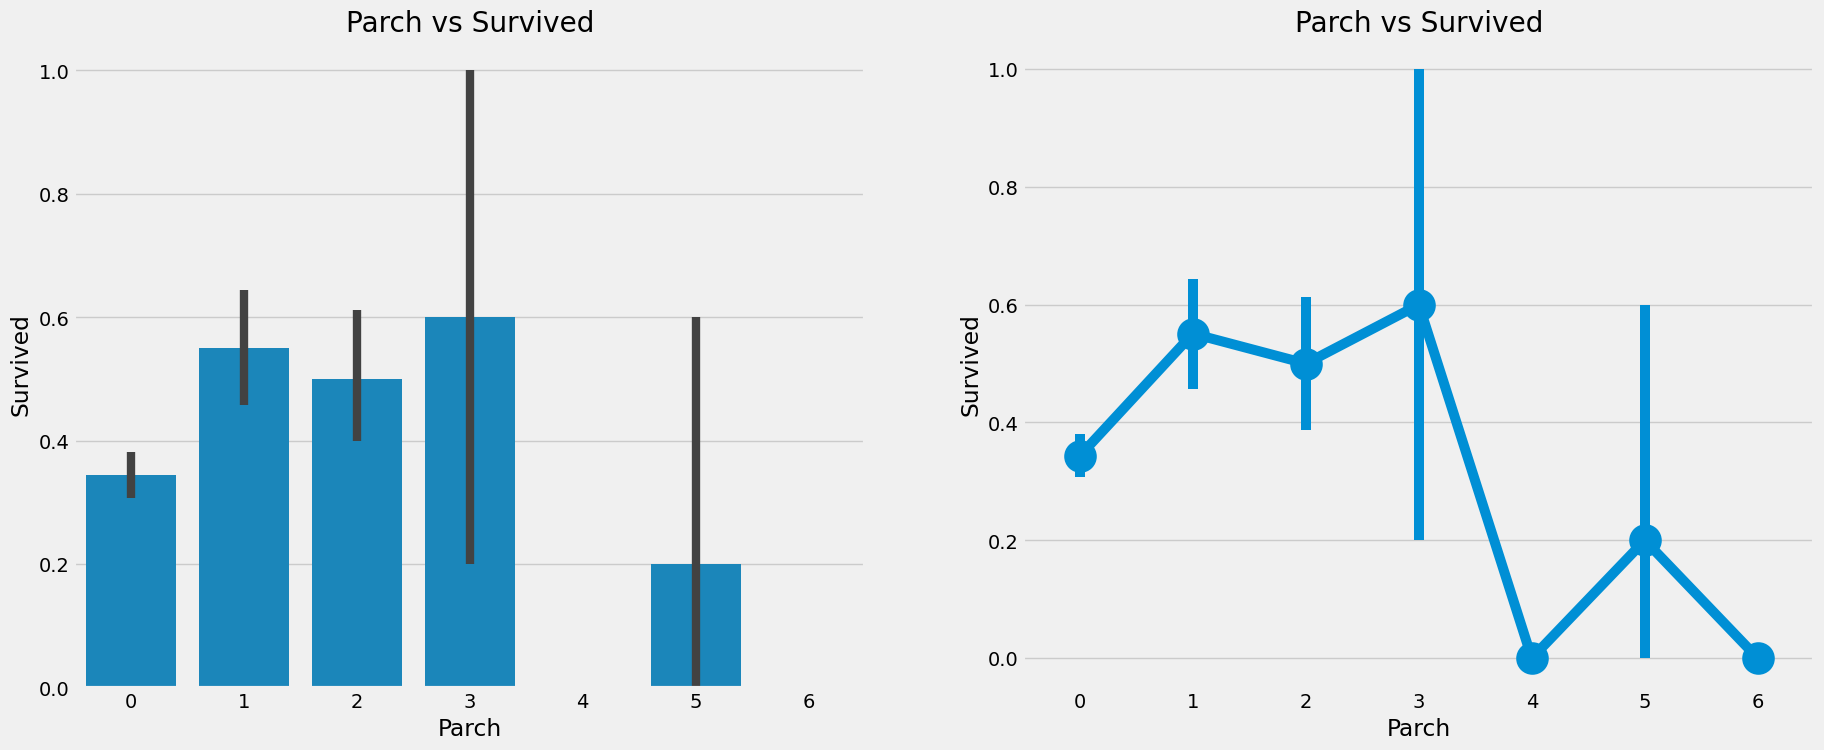

In [ ]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
# 캐글 필기
# sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

- 관찰 결과:

  - 부모님과 함께 탑승한 승객들은 생존 확률이 더 높은 경향이 있음. 그러나 부모님의 수가 많아질수록 생존 확률은 감소함.

  - 1-3명의 부모님과 함께 탑승한 경우 생존 가능성이 높지만, 혼자일 경우 생존에 불리하며 부모님이 4명 이상일 경우 생존 확률이 감소하는 것으로 나타남.


In [ ]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Farea was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Farea was: 0.0
Average Fare was: 32.204207968574636


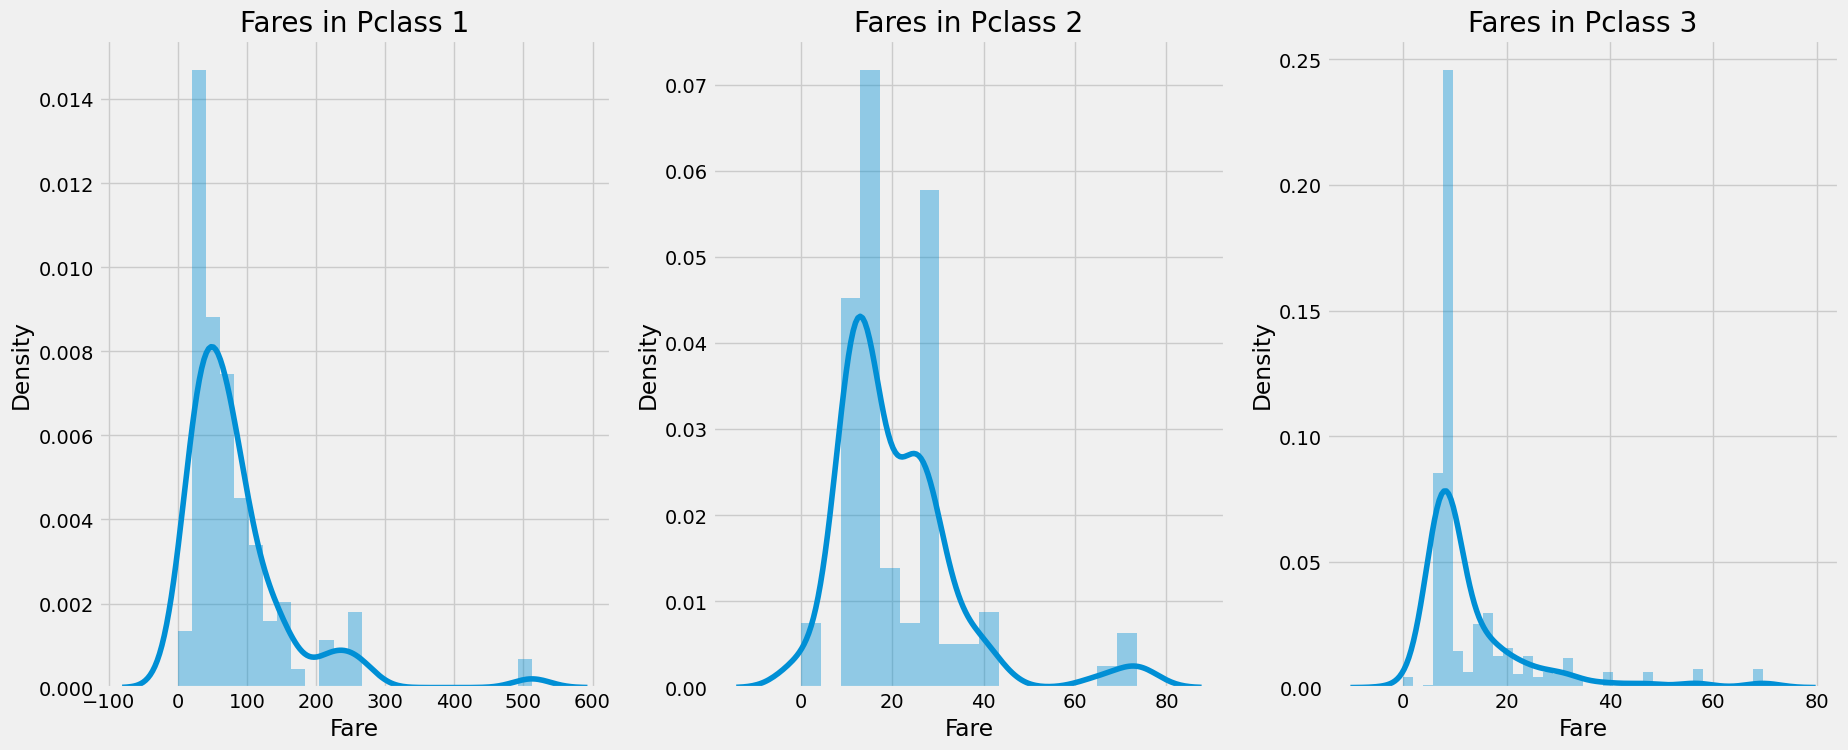

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- 관찰 결과:
  - 성별: 여성의 생존 확률이 남성보다 높습니다.

  - 탑승 등급(Pclass): 1등석 승객의 생존 가능성이 더 높으며, 3등석 승객의 생존 확률은 매우 낮음. 특히 1등석 여성의 생존률은 거의 1에 가깝고, 2등석 여성도 높은 생존 확률을 보임.
  - 연령: 5-10세 이하 어린이들의 생존 확률이 높고, 15-35세 승객의 사망률이 높음.
  - 탑승 항구(Embarked): C 항구에서 탑승한 승객의 생존 확률이 높습니다. 반면 S 항구는 대부분 1등석 승객이 탑승했고, Q 항구는 모두 3등석 승객이었음.
  - 가족 구성(Parch + SibSp): 형제/배우자와 부모님이 각각 1-2명 또는 1-3명일 때 생존 확률이 높으며, 혼자이거나 대가족일 경우 생존 확률이 낮음.

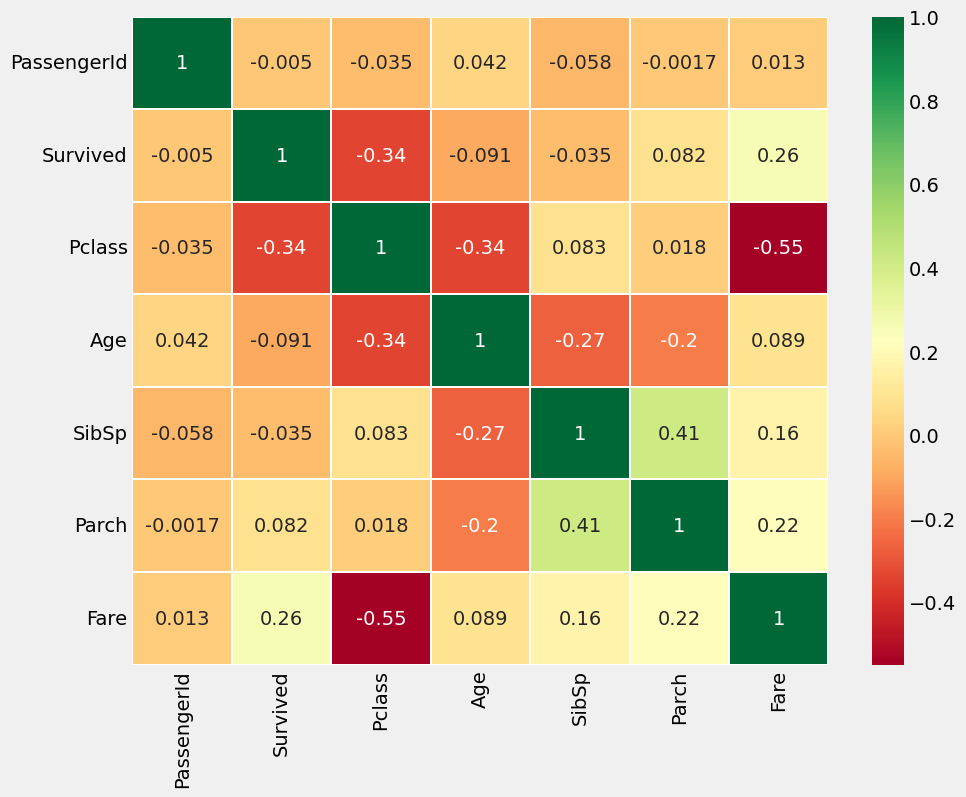

In [ ]:
# 숫자 열만 선택하여 상관 행렬 계산
corr_data = data.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr_data,annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- 히트맵 결과 해석:

  -  숫자형 특성만 비교한다는 점을 주의해야 합니다. 상관관계는 두 특성 간의 관계를 나타내며, 다음과 같은 유형이 있음.

    - 양의 상관관계: 특성 A가 증가할 때 특성 B도 증가하면 양의 상관관계로, 값이 1일 때 완벽한 양의 상관관계를 의미
    - 음의 상관관계: 특성 A가 증가할 때 특성 B가 감소하면 음의 상관관계로, 값이 -1일 때 완벽한 음의 상관관계를 의미함.
  - 두 특성이 높은 상관관계를 가지면 거의 동일한 정보를 포함하게 되어, 이를 다중공선성(MultiCollinearity)이라고 함. 모델 학습 시에는 불필요한 중복 특성을 제거하는 것이 바람직함.

  - 위 히트맵에서 볼 수 있듯이 특성 간 상관관계는 크지 않으며, SibSp와 Parch 간 상관관계가 0.41로 가장 높음. 따라서 모든 특성을 그대로 사용할 수 있음.








## - **특징 엔지니어링 및 데이터 정제**

In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


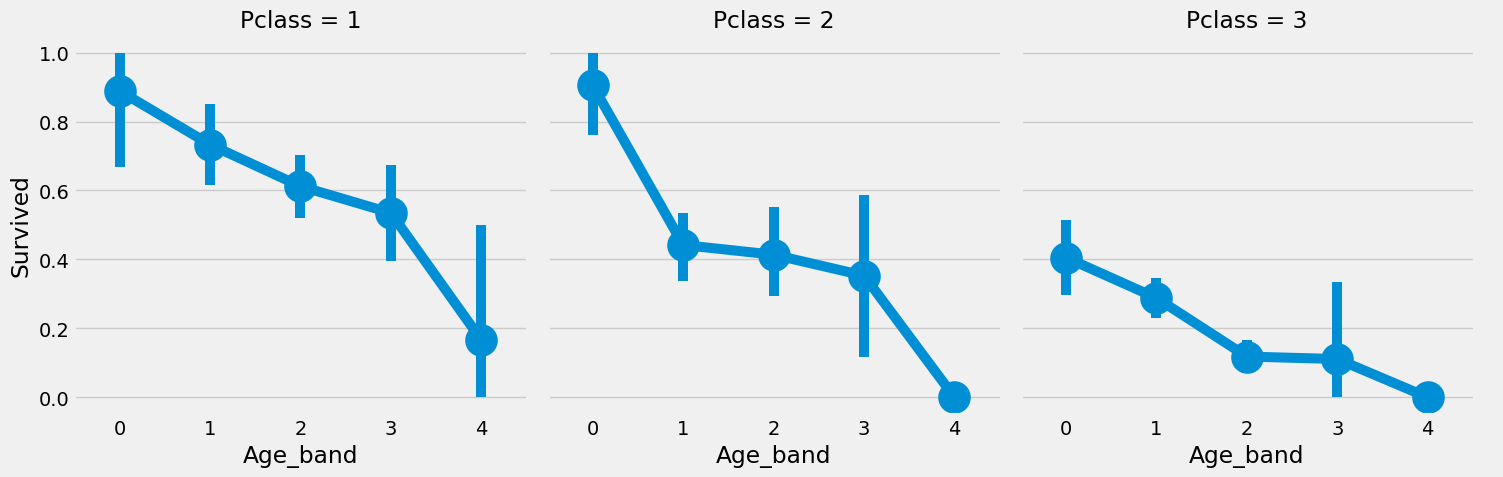

In [ ]:
# 캐글 필사
# sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

### - **가족 크기와 독신**

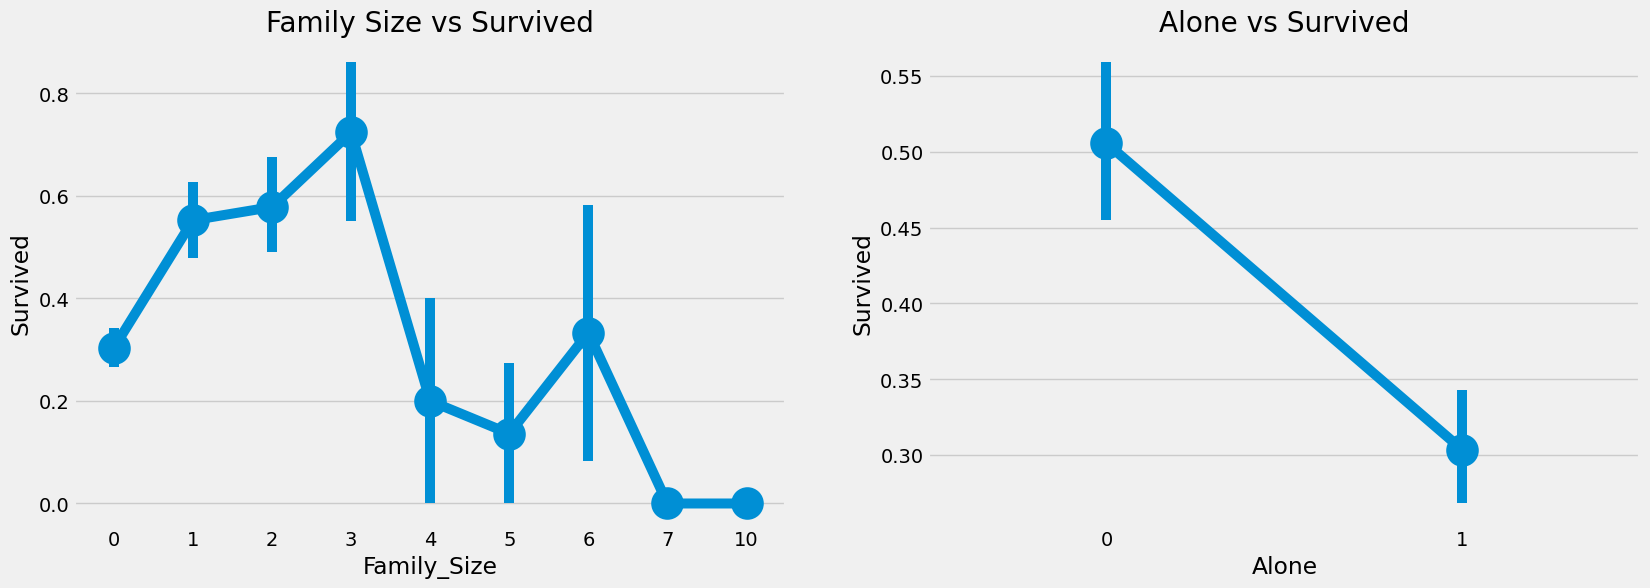

In [ ]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data['Family_Size']==0, 'Alone']=1

f,ax = plt.subplots(1,2, figsize=(18,6))
# 캐글 필사
# sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family Size vs Survived')
# 캐글 필사
# sns.barplot(x='Alone', y='Survived', data=data, ax=ax[1])
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

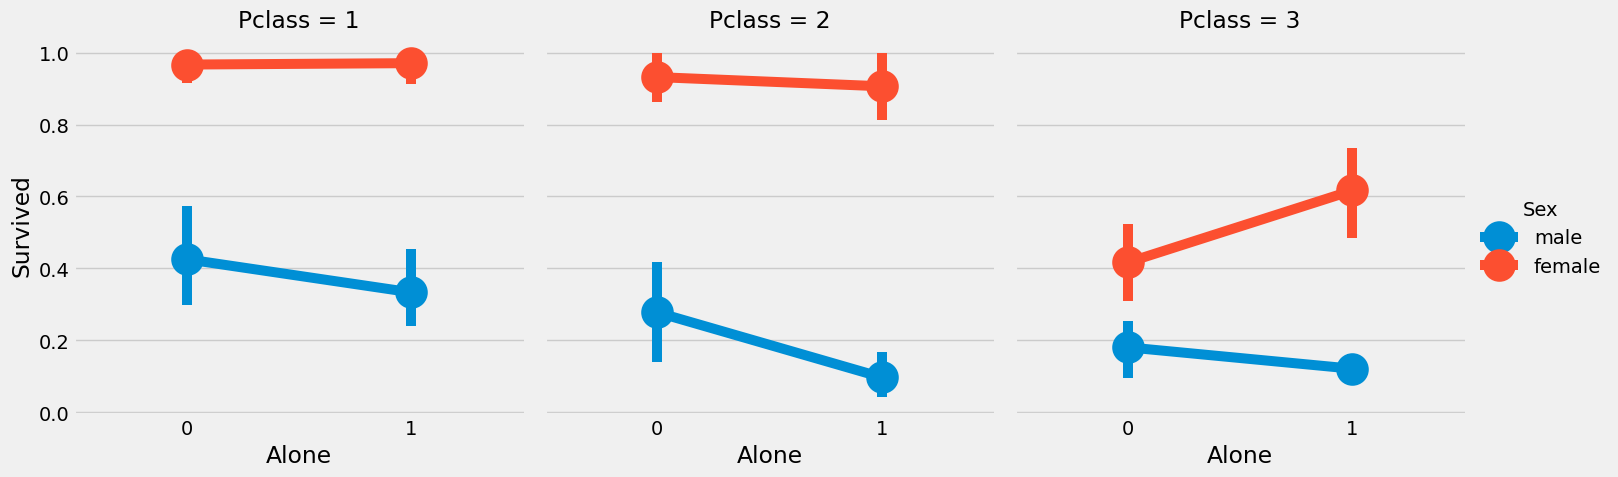

In [ ]:
# 캐글 필사
# sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

In [ ]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat']=3

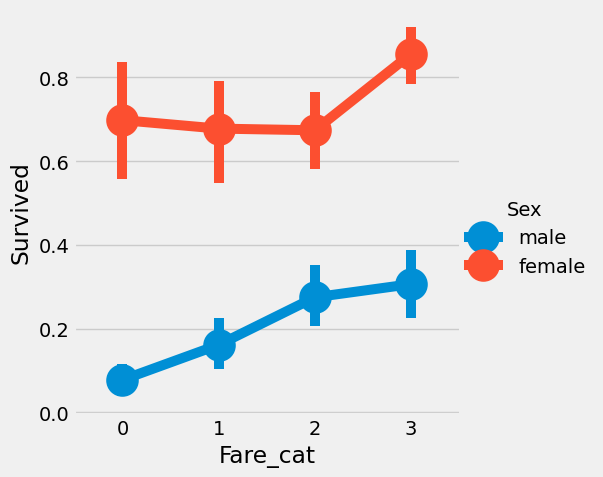

In [ ]:
# 캐글 필사
# sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

In [ ]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

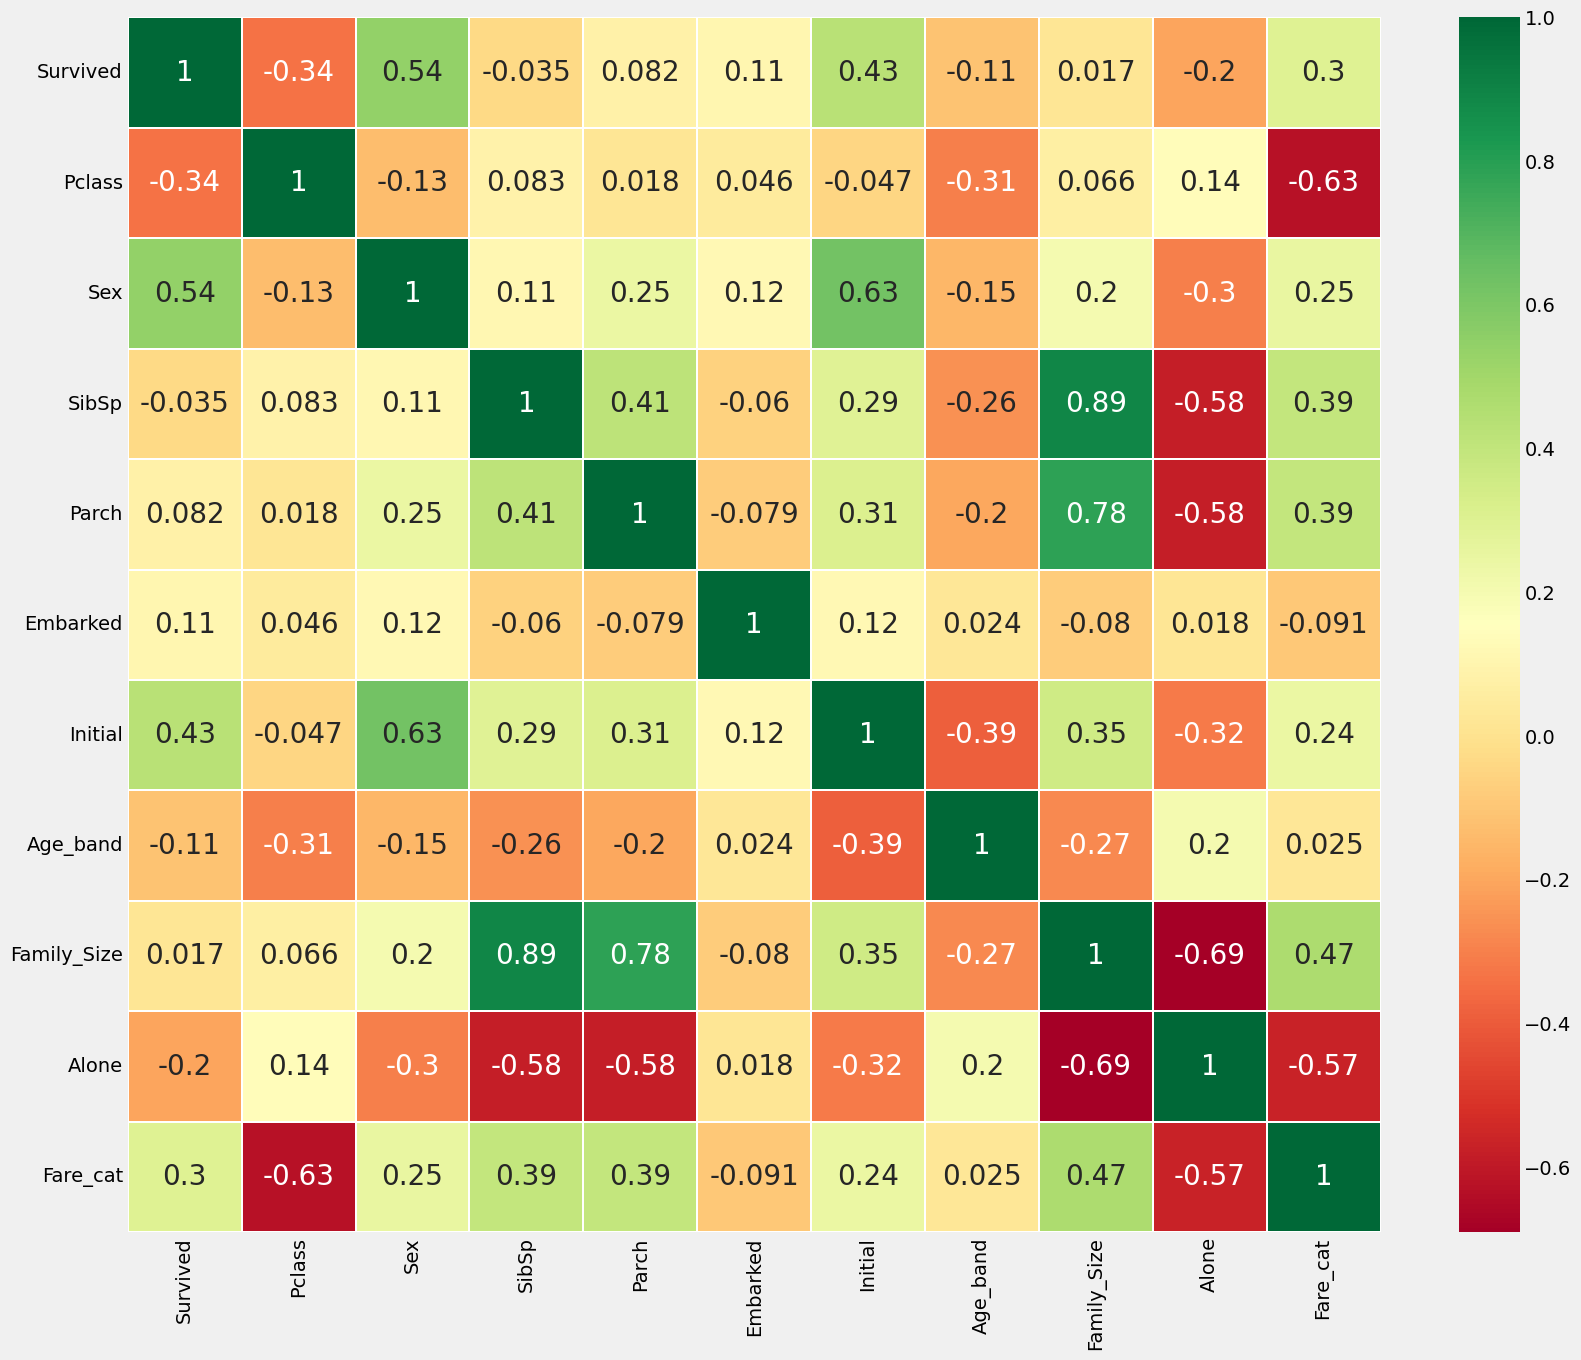

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## - **예측 모델**

1) Logisitic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [ ]:
# Radial Support Vector Machines(rbf-SVM)
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [ ]:
# Linear Support Vector Machine(linear-SVM)
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))


Accuracy for linear SVM is  0.8171641791044776


In [ ]:
# Logistsic Regression
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logisitic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logisitic Regression is 0.8134328358208955


In [ ]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accruacy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accruacy of the Decision Tree is 0.8097014925373134


In [ ]:
# K-Nearest Neighbours (KNN)
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


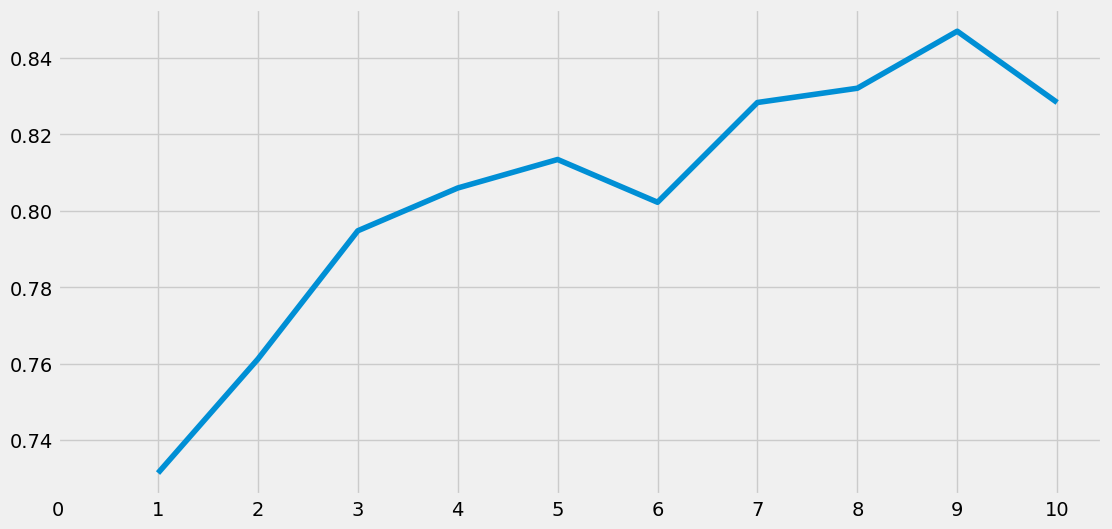

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as 0.8470149253731343


In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
 # 캐글 필사
 # a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
    a = pd.concat([a, pd.Series([metrics.accuracy_score(test_Y, prediction)])], ignore_index=True)
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as', a.max())

In [ ]:
# Gaussian Naive Bayes
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [ ]:
# Random Forests
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8097014925373134


## - **Cross Validation**
  - K-Fold 교차 검증은 데이터셋을 k개의 부분으로 나누어 수행하는 방법
  - 예를 들어, k=5로 설정하면 데이터셋을 5개 부분으로 나눈 후, 그 중 1개 부분을 테스트 데이터로 예약하고 나머지 4개 부분으로 알고리즘을 훈련함. 이 과정을 각 반복에서 테스트 부분을 변경하면서 계속 진행하여, 각 반복에서 얻은 정확도와 오차를 평균하여 알고리즘의 평균 정확도를 계산함.
  - K-Fold 교차 검증을 통해 알고리즘이 특정 훈련 데이터에 대해 과소적합 또는 과적합할 수 있는 문제를 해결하고, 보다 일반화된 모델을 만들 수 있음.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, shuffle=True, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.804732,0.047639
Naive Bayes,0.795843,0.054861
Random Forest,0.814856,0.042487


<Axes: >

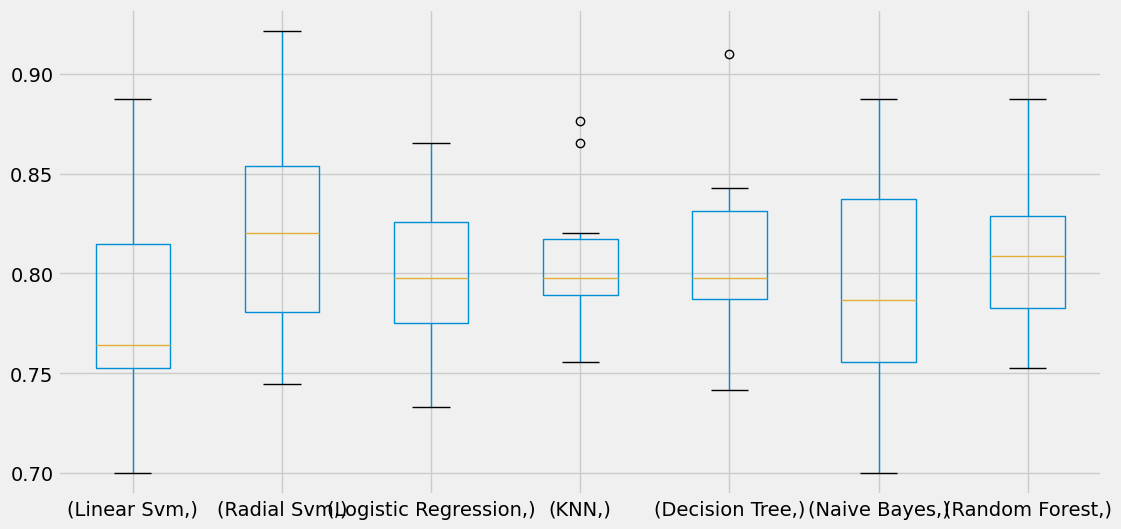

In [ ]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

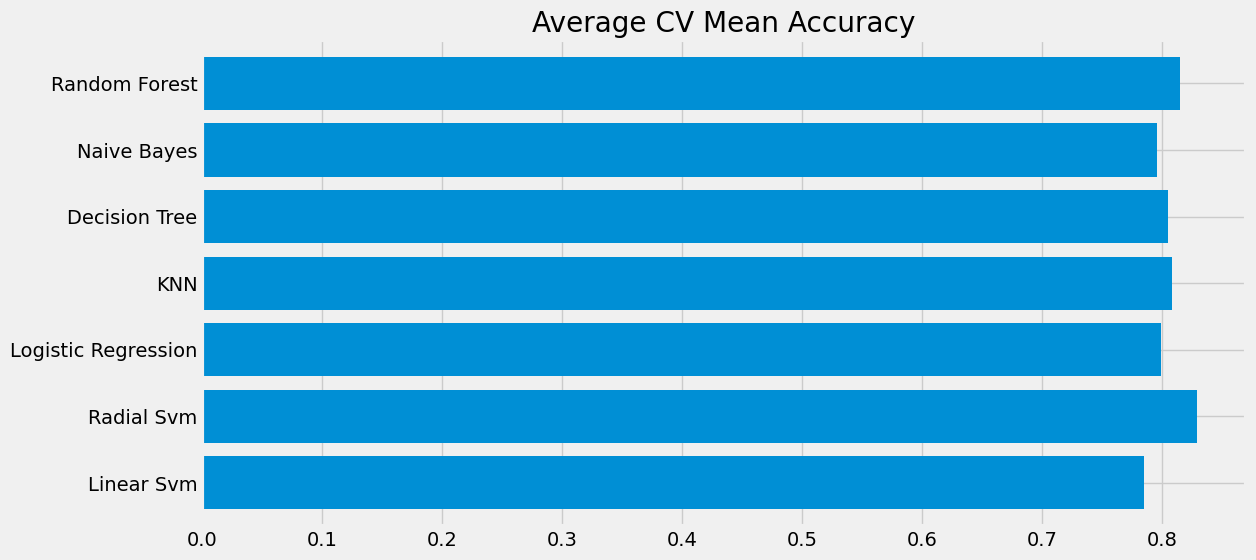

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

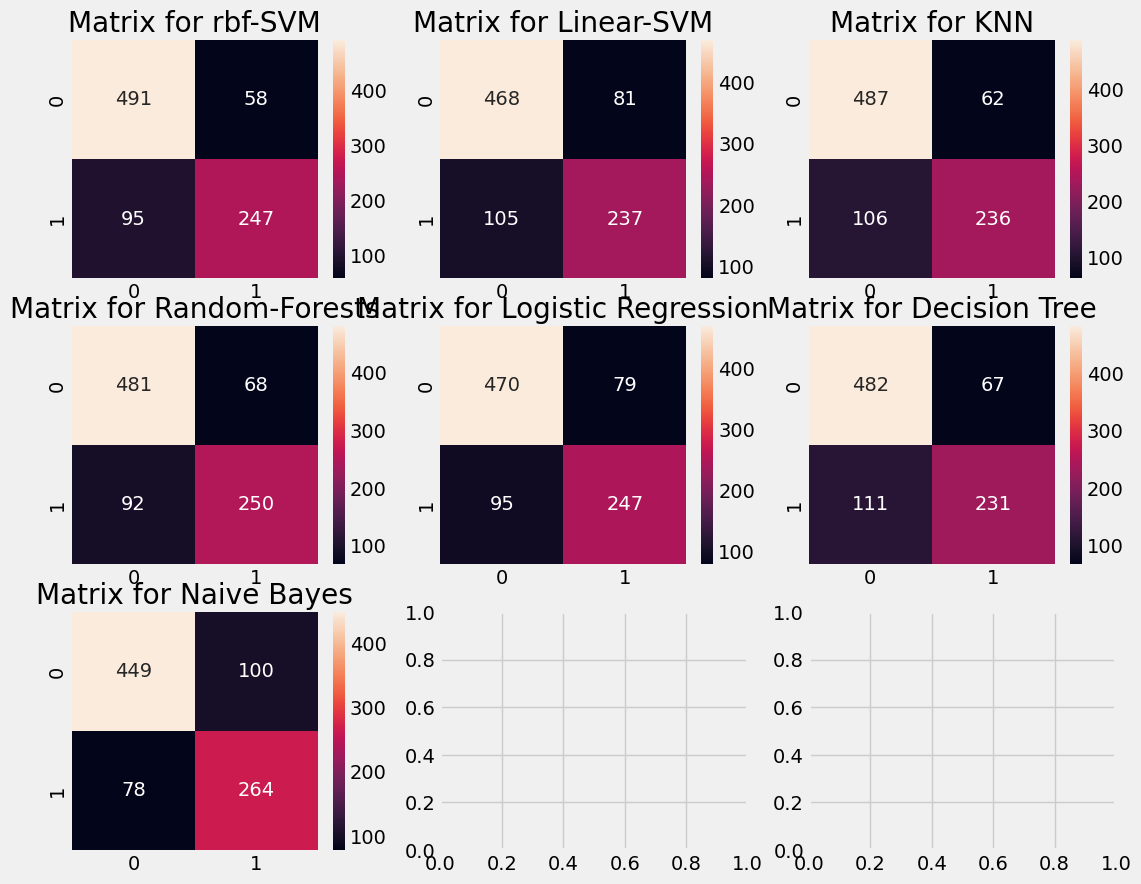

In [ ]:
# Confusion Matrix
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

- 혼동 행렬 해석
  - 혼동 행렬의 왼쪽 대각선은 각 클래스에 대해 올바르게 예측된 수를 보여주고, 오른쪽 대각선은 잘못된 예측 수를 나타냄. rbf-SVM의 첫 번째 플롯을 살펴보면 다음과 같음:
    1. 올바른 예측 수는 사망자로 분류된 491명 + 생존자로 분류된 247명으로, 평균 교차 검증 정확도는 (491+247)/891 = 82.8%입니다. 이는 이전에 얻은 결과와 일치함.
    2. 오류: 사망한 58명을 생존자로 잘못 분류했고, 생존한 95명을 사망자로 잘못 분류했습니다. 따라서 생존자로 예측하는 데 더 많은 실수를 범했음.

  -> 모든 행렬을 살펴보면, rbf-SVM은 사망한 승객을 올바르게 예측하는 데 더 높은 확률을 보이는 반면, Naive Bayes는 생존한 승객을 올바르게 예측하는 데 더 높은 확률을 나타냅니다.





## - **Hyper-Parmaeters Tuning**

In [ ]:
# SVM
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [ ]:
# RandomForests
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## - **Ensembling**
  1)Voting Classifier

  2)Bagging

  3)Boosting.

In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [ ]:
# Bagged DecisionTree
model=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## - **Boosting**

In [ ]:
# AdaBoost(Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [ ]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [ ]:
# XGBoost
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


In [ ]:
# Hyper-Parameter Tuning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


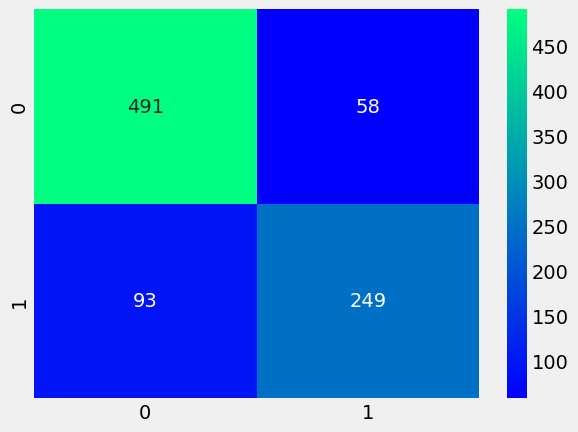

In [ ]:
# Confusion Matrix for the Best Model
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

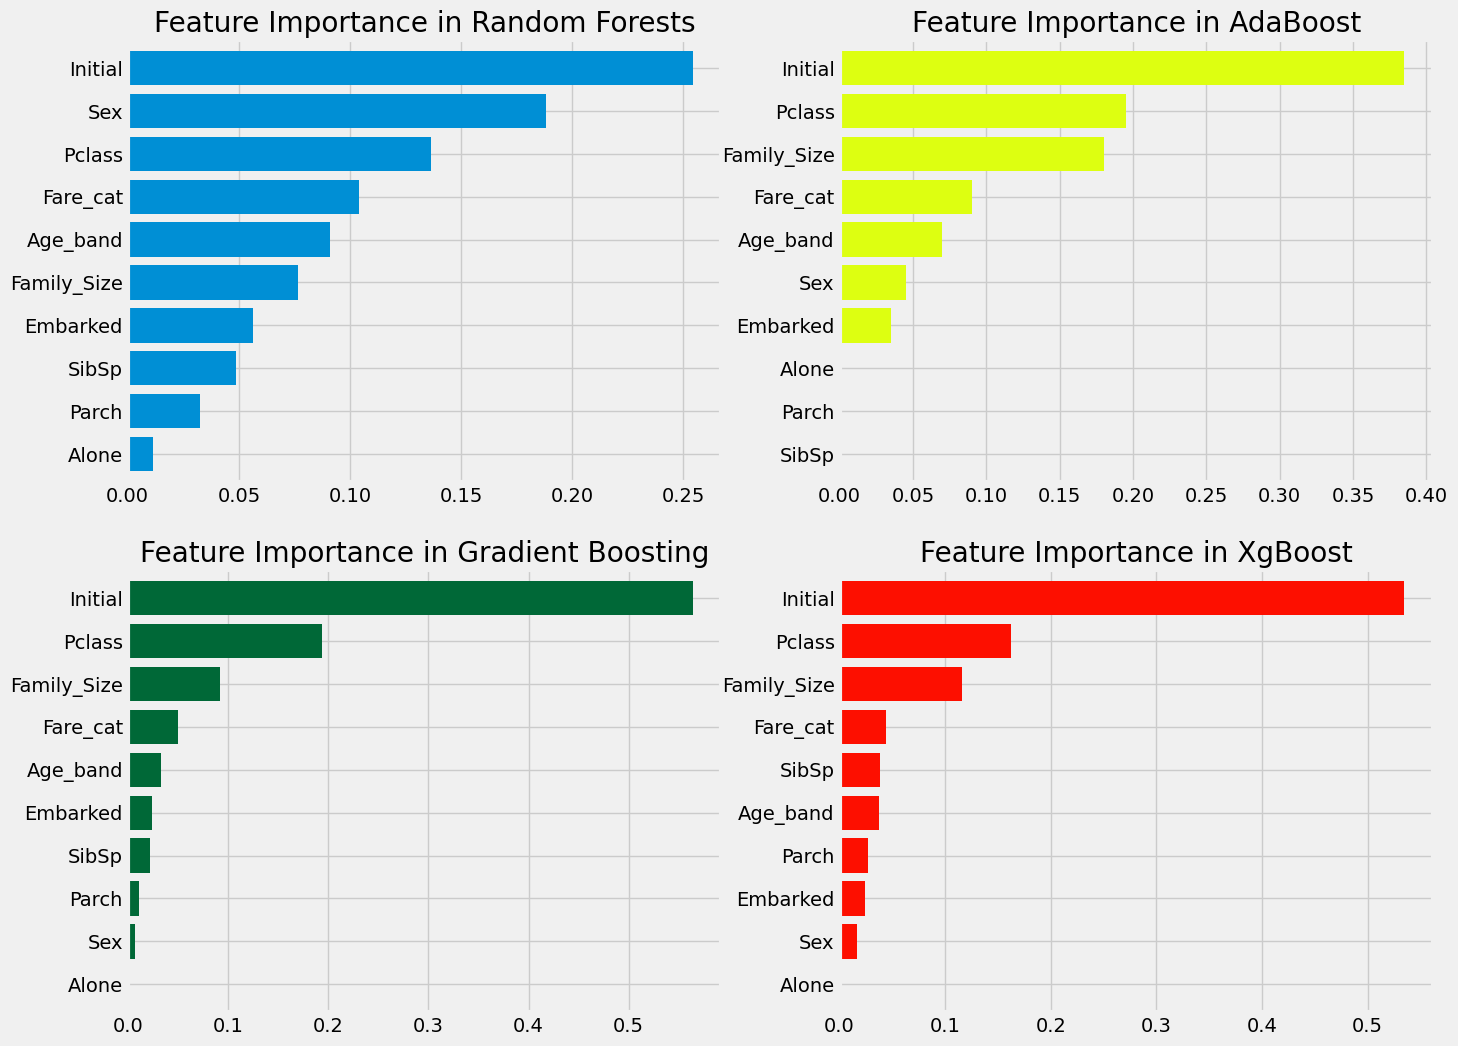

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

- 관찰 결과:

  1. 몇 가지 중요한 공통 특징으로는 Initial, Fare_cat, Pclass, Family_Size가 있음.

  2. 성별(Sex) 특징은 중요성이 없어 보이는데, 이는 충격적임. 이전에 성별과 Pclass가 매우 좋은 구분 요소로 작용한다는 것을 보았기 때문임. 성별은 랜덤 포레스트(Random Forests)에서만 중요하게 보이지만, Initial은 많은 분류기에서 가장 높은 순위를 차지하고 있음. 성별과 Initial 간의 긍정적인 상관관계도 확인했으므로, 이 두 특징은 모두 성별을 나타냄.

  3. Pclass와 Fare_cat는 승객의 지위(status)를 나타내며, Family_Size는 Alone, Parch, SibSp와 관련이 있음.